In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
directorio = 'dataset'
archivo = 'Entrenamieto_ECI_2020.csv'
fname = os.path.join(directorio,archivo)
#De esta forma puedo filtrar columnas.
df = pd.read_csv(fname, parse_dates= ['Account_Created_Date','Delivery_Year', 
                                      'Quote_Expiry_Date', 'Month', 
                                      'Actual_Delivery_Date', 'Planned_Delivery_End_Date',
                                       'Planned_Delivery_Start_Date', 'Opportunity_Created_Date',
                                       'Last_Modified_Date'] )


In [3]:
df.shape

(16947, 52)

El data set esta compuesto por 16947 observaciones y 52 caracteristicas

In [4]:
df.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016-01-01,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016-01-01,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016-01-01,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018-01-01,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018-01-01,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018-01-01,NaT,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2017-01-01,NaT,7,USD,2659494.6,USD,2659494.6,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016-01-01,NaT,0,USD,50688.0,USD,50688.0,Closed Won,Prod_Category_A_None
8,24353,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,Q1,2016-01-01,NaT,0,JPY,15600.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,Q1,2016-01-01,NaT,0,JPY,4400.0,JPY,470400.0,Closed Lost,Prod_Category_A_None


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [6]:
df.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

### Convierto algunos tipos de datos:

In [7]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Total_Taxable_Amount'] = pd.to_numeric(df['Total_Taxable_Amount'], errors='coerce')
df['Total_Amount'] = pd.to_numeric(df['Total_Amount'], errors='coerce')

In [8]:
df.describe(datetime_is_numeric=True)

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Account_Created_Date,Opportunity_ID,Opportunity_Created_Date,Price,...,ASP,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.0,16947,16947.000000,16947,356.000000,...,13738.000000,13738.000000,16947,16872,16947,16947,0,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,0.0,2015-06-17 17:18:40.977173248,5335.940225,2017-05-20 09:38:59.458311168,0.320323,...,7.012128,0.432554,2017-08-15 16:07:28.645800192,2017-09-07 19:45:55.049772800,2017-08-02 13:45:03.982937856,2017-02-19 21:40:59.267113216,NaT,2.338172,1.993659e+06,3.224117e+06
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.0,2013-07-27 00:00:00,0.000000,2013-11-05 00:00:00,0.200000,...,0.000000,0.000000,2016-01-01 00:00:00,2016-01-05 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,NaT,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,0.0,2013-10-03 00:00:00,2448.500000,2016-10-12 00:00:00,0.260000,...,0.360000,0.373260,2016-12-15 00:00:00,2016-12-31 00:00:00,2016-12-01 00:00:00,2016-01-01 00:00:00,NaT,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,0.0,2015-04-20 00:00:00,5306.000000,2017-06-02 00:00:00,0.307500,...,0.400000,0.412850,2017-08-28 00:00:00,2017-09-22 00:00:00,2017-08-01 00:00:00,2017-01-01 00:00:00,NaT,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,0.0,2016-07-25 00:00:00,7698.000000,2018-01-22 00:00:00,0.370000,...,0.505000,0.476490,2018-05-01 00:00:00,2018-05-21 00:00:00,2018-05-01 00:00:00,2018-01-01 00:00:00,NaT,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,0.0,2018-12-21 00:00:00,12803.000000,2018-12-29 00:00:00,0.560000,...,80.000000,67.000000,2020-09-17 00:00:00,2208-12-31 00:00:00,2020-09-01 00:00:00,2020-01-01 00:00:00,NaT,500.000000,1.320000e+09,1.356339e+09
std,6940.859372,0.393893,0.492979,0.499413,0.466055,0.0,NaN,3324.723809,NaN,0.074717,...,18.858359,0.758659,NaN,NaN,NaN,NaN,NaN,12.169339,1.848426e+07,2.030360e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [10]:
#Borro la columna ya que no contiene ningún valor
df.drop(columns=['Actual_Delivery_Date'], inplace=True)

In [11]:
df.isnull().any()

ID                                    False
Region                                False
Territory                             False
Pricing, Delivery_Terms_Quote_Appr    False
Pricing, Delivery_Terms_Approved      False
Bureaucratic_Code_0_Approval          False
Bureaucratic_Code_0_Approved          False
Submitted_for_Approval                False
Bureaucratic_Code                     False
Account_Created_Date                  False
Source                                False
Billing_Country                       False
Account_Name                          False
Opportunity_Name                      False
Opportunity_ID                        False
Sales_Contract_No                     False
Account_Owner                         False
Opportunity_Owner                     False
Account_Type                          False
Opportunity_Type                      False
Quote_Type                            False
Delivery_Terms                        False
Opportunity_Created_Date        

In [12]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,2016-05-01,Q2,2016-01-01,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,2016-01-01,Q1,2016-01-01,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,2016-01-01,Q1,2016-01-01,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,2018-02-01,Q1,2018-01-01,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,2018-02-01,Q1,2018-01-01,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [13]:
df[df['Opportunity_ID']==10]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
18,24366,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,2016-02-01,Q1,2016-01-01,0,JPY,23400.0,JPY,579600.0,Closed Lost,Prod_Category_A_None
19,24367,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,2016-02-01,Q1,2016-01-01,0,JPY,4400.0,JPY,579600.0,Closed Lost,Prod_Category_A_None
20,24368,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,2016-02-01,Q1,2016-01-01,0,JPY,6200.0,JPY,579600.0,Closed Lost,Prod_Category_A_None
21,24369,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,2016-02-01,Q1,2016-01-01,0,JPY,140000.0,JPY,579600.0,Closed Lost,Prod_Category_A_None
22,24370,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,2016-02-01,Q1,2016-01-01,0,JPY,405600.0,JPY,579600.0,Closed Lost,Prod_Category_A_None


Cada oportunidad esta compuesta por un grupo de productos. En este caso la oportunidad 10  esta compuesta por cinco productos.

In [14]:
df['Total_Amount'][df['Opportunity_ID']==10].sum()

579600.0

Se observa que la sumatoria de la columna 'Total_Amount' es igual al valor en la columna 'Total_Taxable_Amount'

In [15]:
df['Total_Taxable_Amount'][df['Opportunity_ID']==10]

18    579600.0
19    579600.0
20    579600.0
21    579600.0
22    579600.0
Name: Total_Taxable_Amount, dtype: float64

Queremos determinar en promedio el número de producto por oportunidad:

In [16]:
df_oportunidad = df[['Stage','Opportunity_Name', 'Opportunity_ID']]
df_oportunidad = df_oportunidad.groupby(['Stage', 'Opportunity_Name'], as_index=False)['Opportunity_ID'].count()
df_oportunidad['Opportunity_ID'].describe()

count    9841.000000
mean        1.722081
std         1.689605
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        36.000000
Name: Opportunity_ID, dtype: float64

La oportunidad con mayor cantidad de productos tiene 36 productos, y el promedio es 1.72 productos.

# Análisis de variables:
### Se realiza una análisis considerando solo las oportunidades ganadas y perdidas.

In [17]:
df_ganadas_perdidas = df[['Stage', 'Opportunity_ID']].drop_duplicates()
df_ganadas_perdidas = df_ganadas_perdidas[(df_ganadas_perdidas['Stage'] == 'Closed Lost') | (df_ganadas_perdidas['Stage'] == 'Closed Won')]
df_ganadas_perdidas = df_ganadas_perdidas.groupby(['Stage'], as_index=False)['Opportunity_ID'].count()
df_ganadas_perdidas

,Stage,Opportunity_ID
0,Closed Lost,4719
1,Closed Won,5072


Se un total de 9841 oportunidades, 9791 se ecnuentran cerradas, de las cuales 4719 se ganaro y 5072 se perdieron.

## Variable Region:

In [18]:
#Agrupamos las opertunidades:
df_region = df[['Stage', 'Region', 'Opportunity_ID']].drop_duplicates()

df_region = df_region[(df_region['Stage'] == 'Closed Lost') | (df_region['Stage'] == 'Closed Won')]
df_region = df_region.groupby(['Stage','Region'], as_index=False)['Opportunity_ID'].count()
df_region.sort_values('Opportunity_ID',ascending=False)

,Stage,Region,Opportunity_ID
2,Closed Lost,EMEA,1737
7,Closed Won,EMEA,1500
1,Closed Lost,Americas,1358
8,Closed Won,Japan,1290
5,Closed Won,APAC,1155
6,Closed Won,Americas,1094
0,Closed Lost,APAC,924
3,Closed Lost,Japan,595
4,Closed Lost,Middle East,105
9,Closed Won,Middle East,33


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 <a list of 9 Text yticklabel objects>)

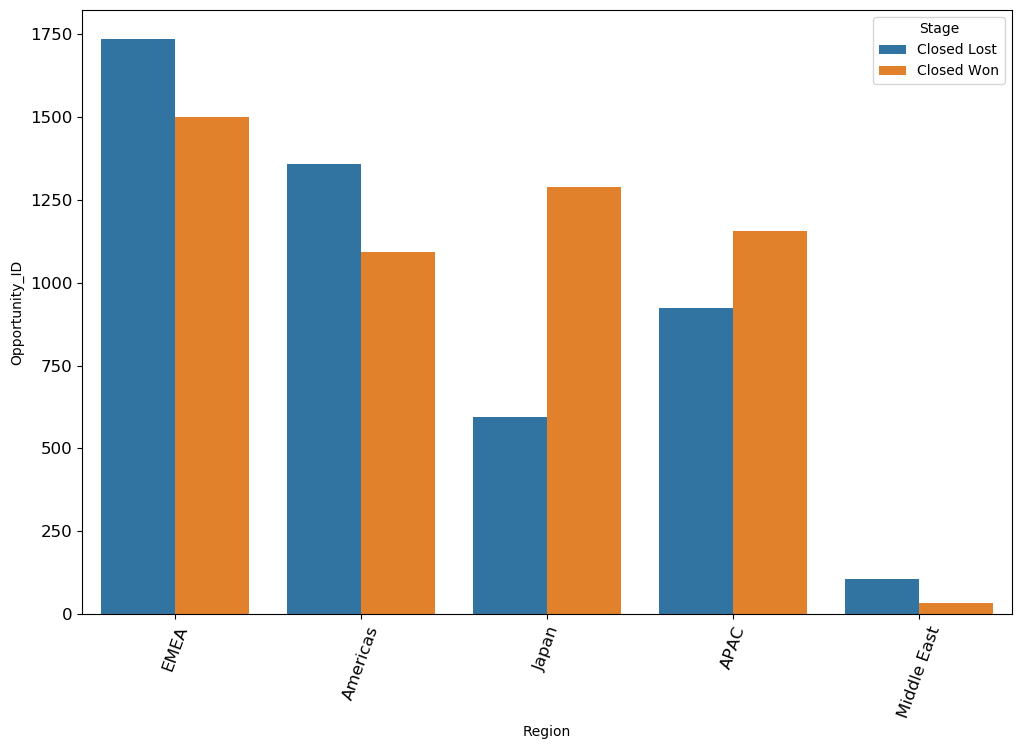

In [51]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
sns.barplot(x='Region', y='Opportunity_ID', hue='Stage', data=df_region.sort_values('Opportunity_ID',ascending=False))
plt.xticks(rotation=70, fontsize = 12)
plt.yticks(fontsize = 12)

## Variable Territory:

In [20]:
#Agrupamos las opertunidades:
df_territorio = df[['Stage', 'Region', 'Territory', 'Opportunity_ID']].drop_duplicates()
df_territorio = df_territorio[(df_territorio['Stage'] == 'Closed Lost') | (df_territorio['Stage'] == 'Closed Won')]
df_territorio = df_territorio.groupby(['Stage','Region','Territory'], as_index=False)['Opportunity_ID'].count()
df_territorio.columns =  ['Stage','Region','Territory', 'numero_oportunidades']
df_territorio.nlargest(75,'numero_oportunidades')

,Stage,Region,Territory,numero_oportunidades
128,Closed Won,Japan,None,807
108,Closed Won,EMEA,Germany,592
97,Closed Won,Americas,NW America,553
40,Closed Lost,EMEA,Germany,488
127,Closed Won,Japan,Japan,483
...,...,...,...,...
56,Closed Lost,EMEA,Norway,11
42,Closed Lost,EMEA,Hungary,9
31,Closed Lost,EMEA,Central America,8
33,Closed Lost,EMEA,Cyprus,8


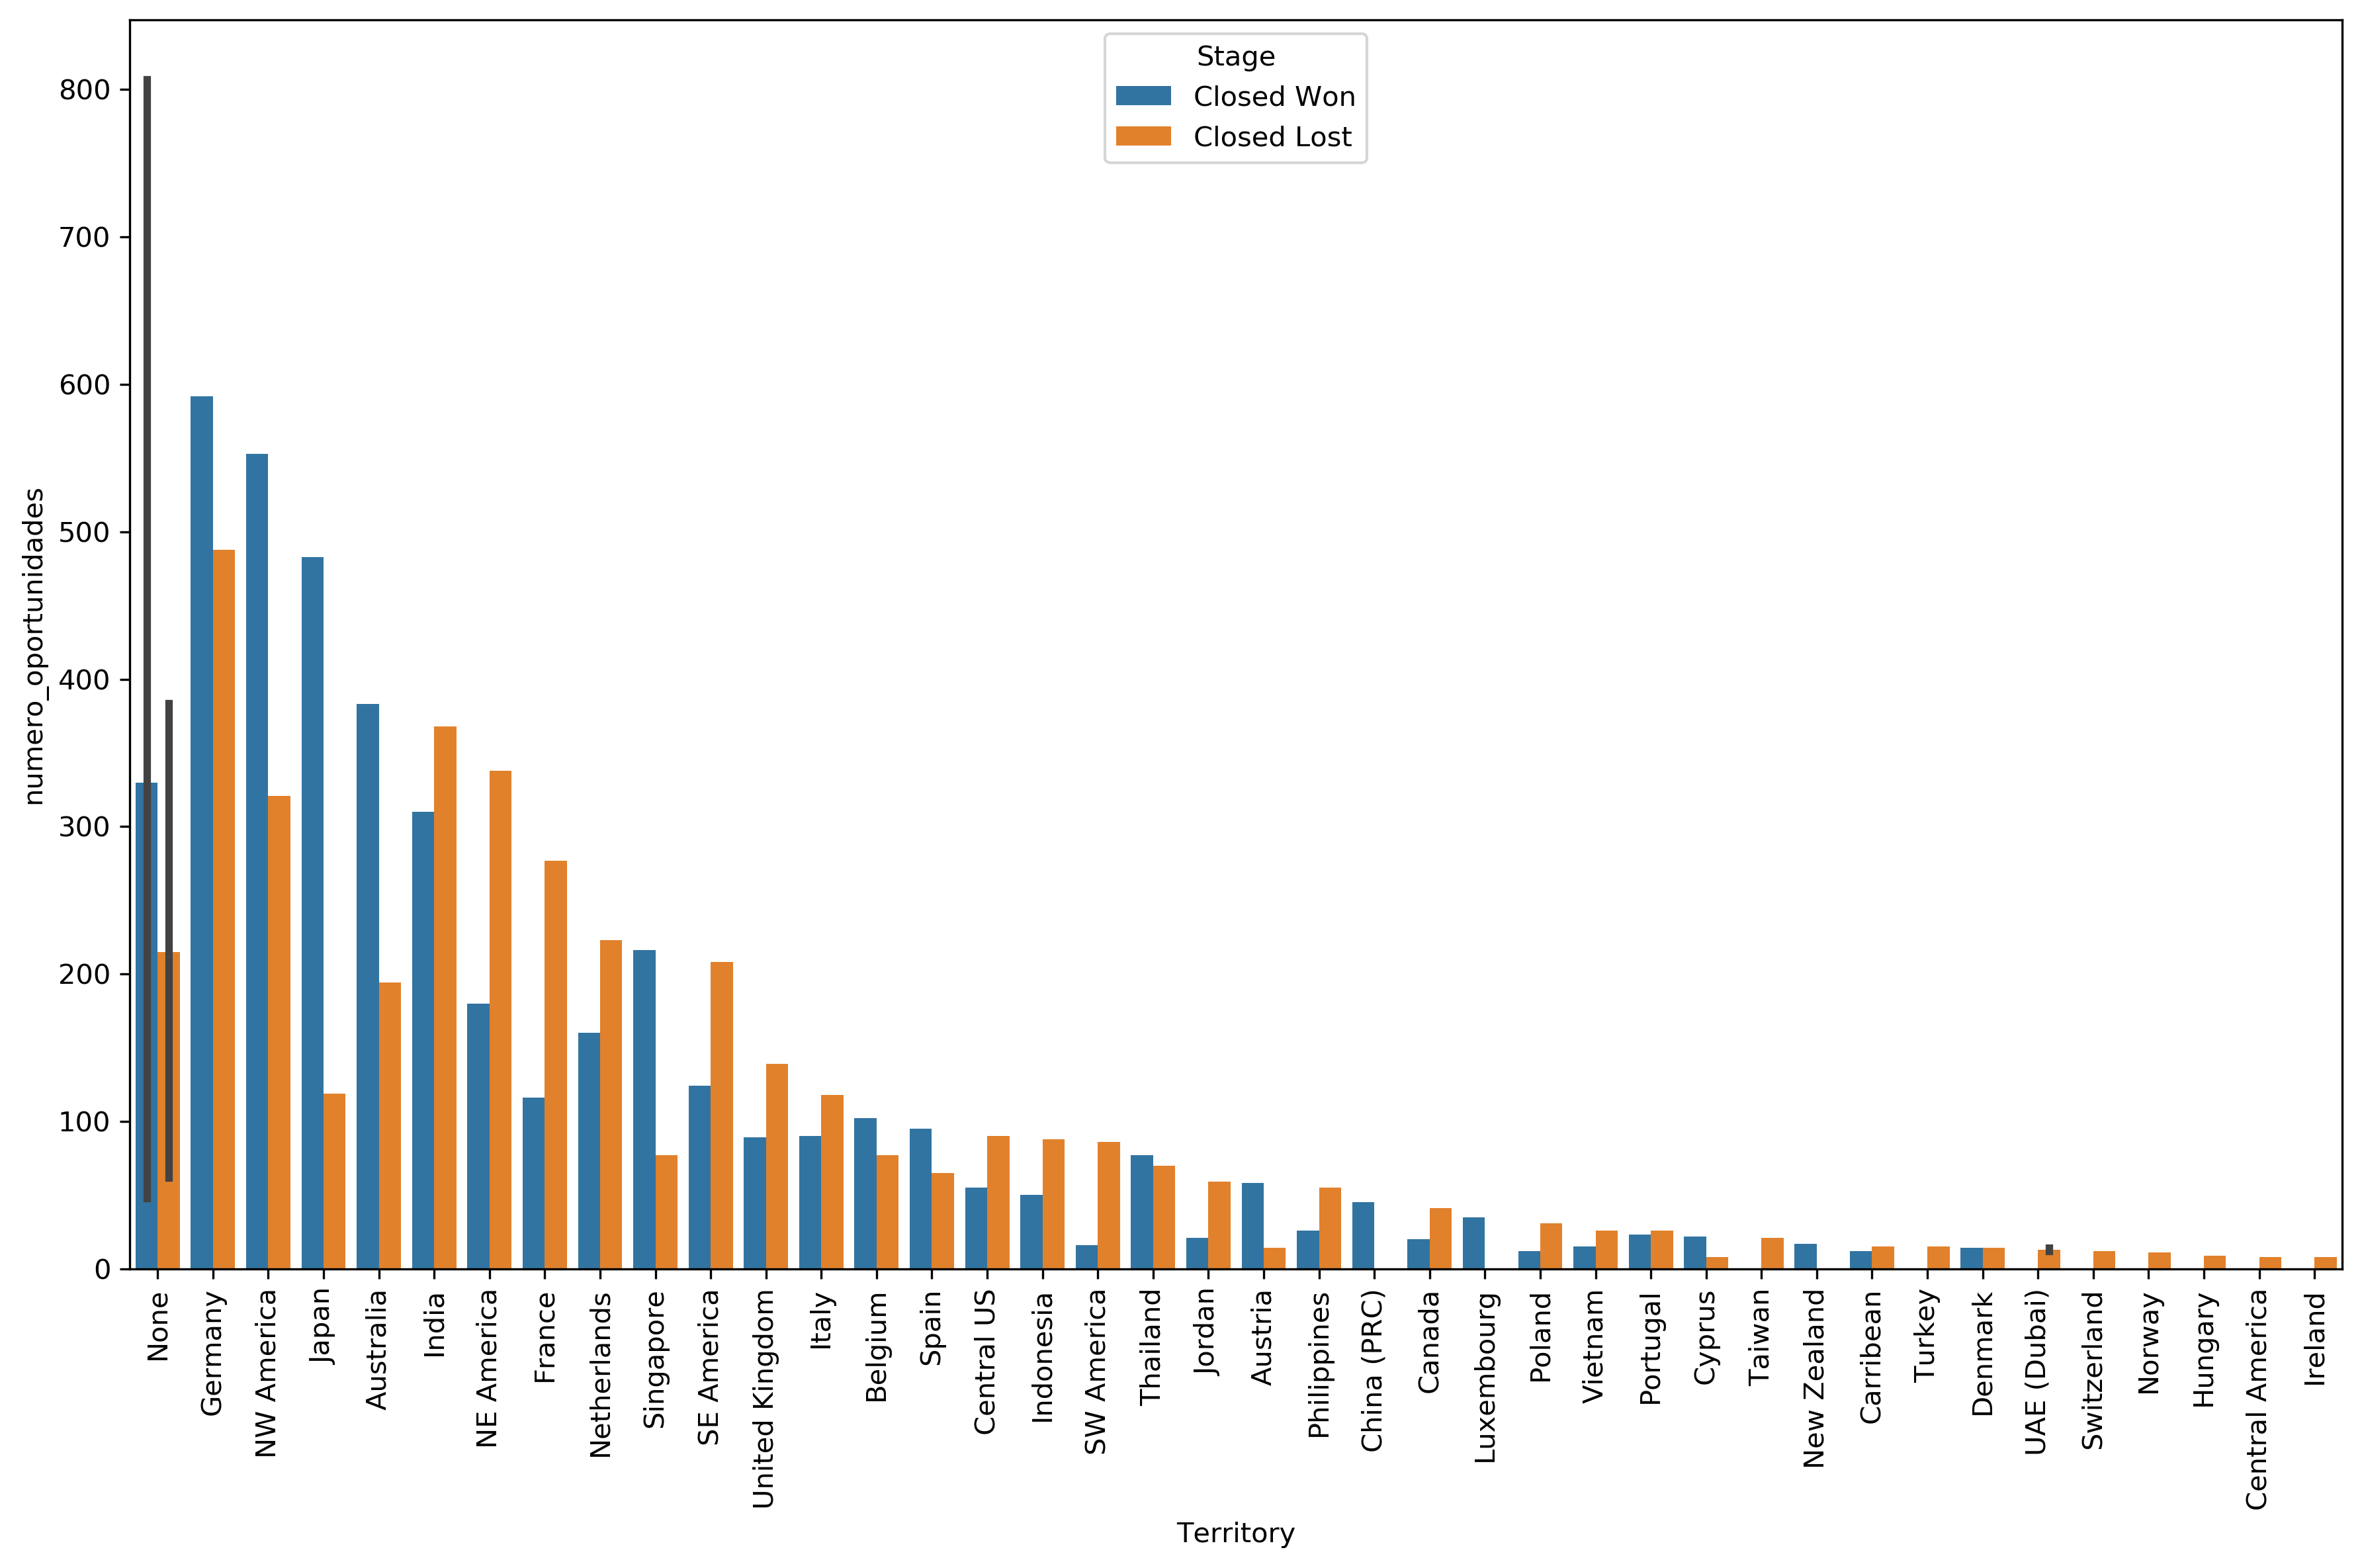

In [21]:
fig=plt.figure(figsize=(12,8), dpi= 300, facecolor='w', edgecolor='0.4')
sns.barplot(x='Territory', y='numero_oportunidades', hue='Stage', data=df_territorio.nlargest(75, 'numero_oportunidades') )
plt.xticks(rotation=90)
plt.tight_layout()

In [22]:
df_territorio[df_territorio['Territory'] == 'None']['numero_oportunidades'].sum()

1851

#### Se observa que de 9791 oportunidades 1851 no se encuentran clasificadas por territorio

In [23]:
df_territorio_none = df_territorio.loc[df_territorio['Territory'] == 'None'].sort_values('numero_oportunidades', ascending=False)
df_territorio_none

,Stage,Region,Territory,numero_oportunidades
128,Closed Won,Japan,None,807
72,Closed Lost,Japan,None,476
21,Closed Lost,Americas,None,259
98,Closed Won,Americas,None,134
55,Closed Lost,EMEA,None,107
117,Closed Won,EMEA,None,48
76,Closed Lost,Middle East,None,17
131,Closed Won,Middle East,None,3


In [24]:
df_territorio_none['numero_oportunidades'] =  df_territorio_none['numero_oportunidades'] / df_territorio_none['numero_oportunidades'].sum() * 100
df_territorio_none.columns =  ['Stage','Region', 'Territory', 'porcentaje_oportunidades']
df_territorio_none

,Stage,Region,Territory,porcentaje_oportunidades
128,Closed Won,Japan,None,43.598055
72,Closed Lost,Japan,None,25.715829
21,Closed Lost,Americas,None,13.992437
98,Closed Won,Americas,None,7.239330
55,Closed Lost,EMEA,None,5.780659
117,Closed Won,EMEA,None,2.593193
76,Closed Lost,Middle East,None,0.918422
131,Closed Won,Middle East,None,0.162075


#### De las oportunidades que no se encuentran clasificadas por territorio,  69.32 % Se encuentrán en Japon.

,Stage,Region,Territory,porcentaje_oportunidades
128,Closed Won,Japan,None,43.598055
72,Closed Lost,Japan,None,25.715829
21,Closed Lost,Americas,None,13.992437
98,Closed Won,Americas,None,7.239330
55,Closed Lost,EMEA,None,5.780659
117,Closed Won,EMEA,None,2.593193
76,Closed Lost,Middle East,None,0.918422
131,Closed Won,Middle East,None,0.162075


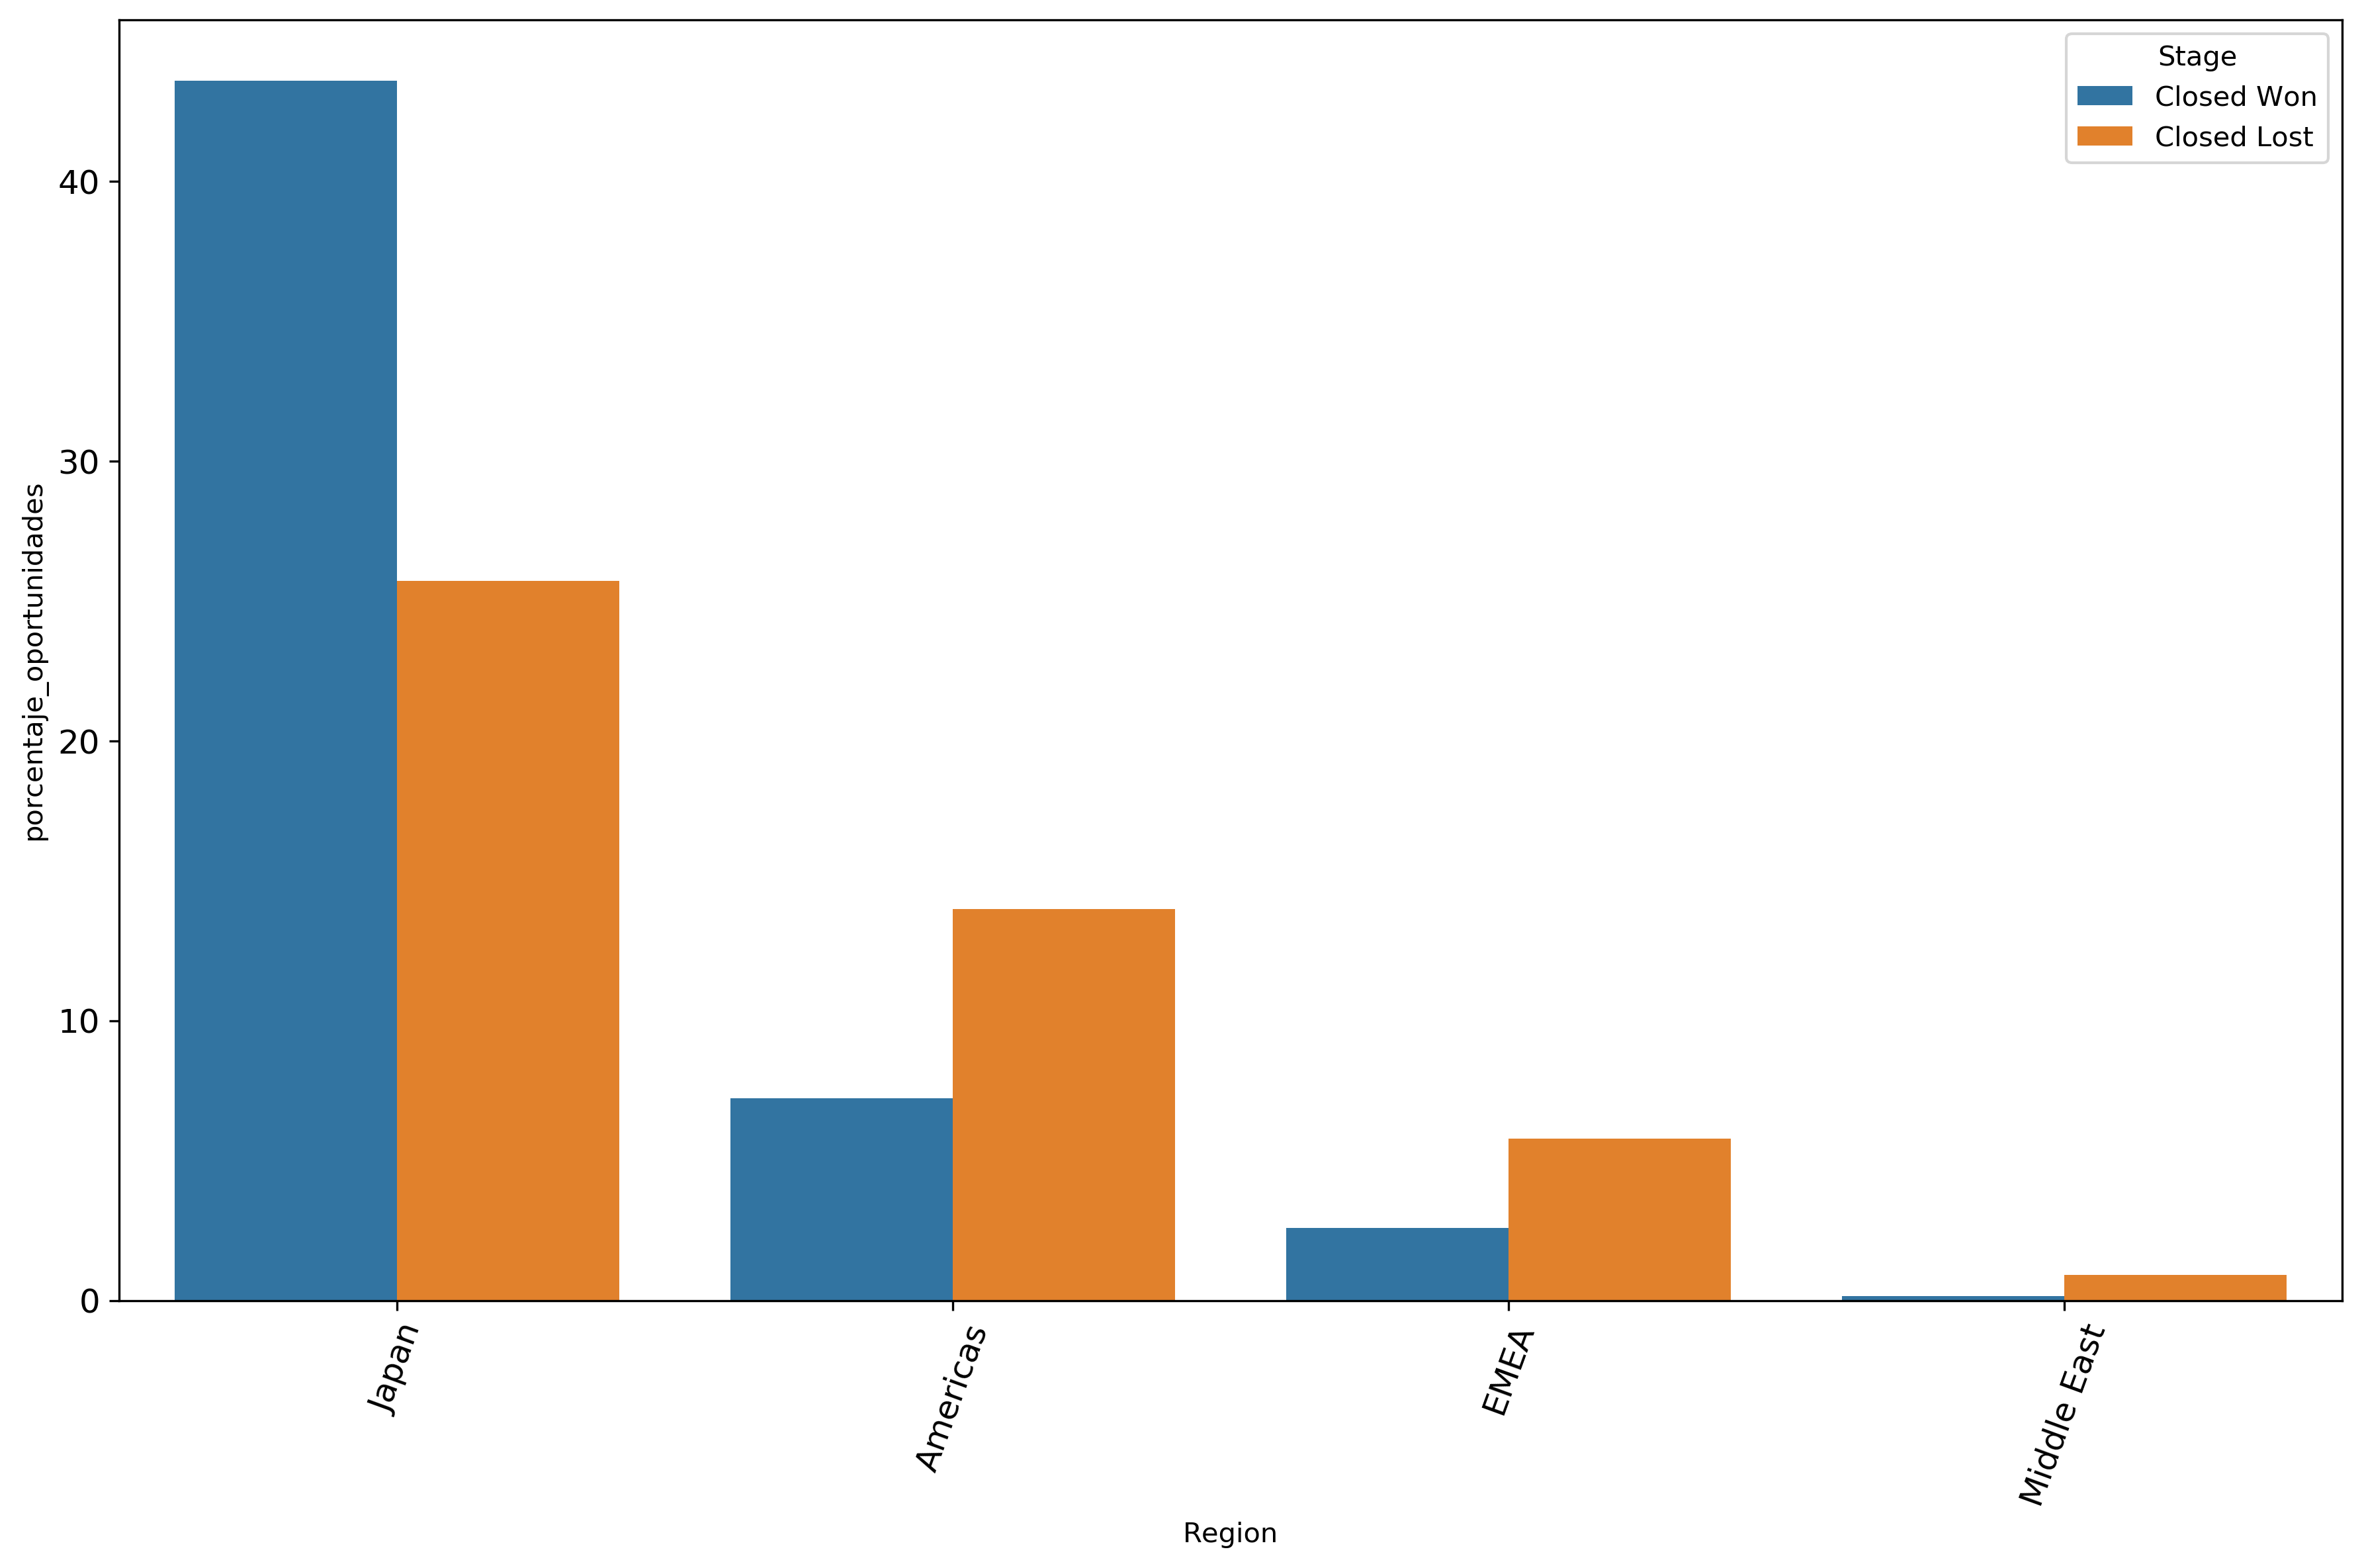

In [50]:
fig=plt.figure(figsize=(12,8), dpi= 300, facecolor='w', edgecolor='0.4')
sns.barplot(x='Region', y='porcentaje_oportunidades', hue='Stage', data=df_territorio_none)
plt.xticks(rotation=70, fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
df_territorio_none

## Paises por región - Japan:

In [36]:
df_territorio.loc[df_territorio['Region'] == 'Japan']

,Stage,Region,Territory,numero_oportunidades
71,Closed Lost,Japan,Japan,119
72,Closed Lost,Japan,None,476
127,Closed Won,Japan,Japan,483
128,Closed Won,Japan,None,807


Se observa que la región Japan solo cuenta con el territorio Japan y None. Podemos pensar que puede ser viable completar los None con Japan cuando la región es Japan.

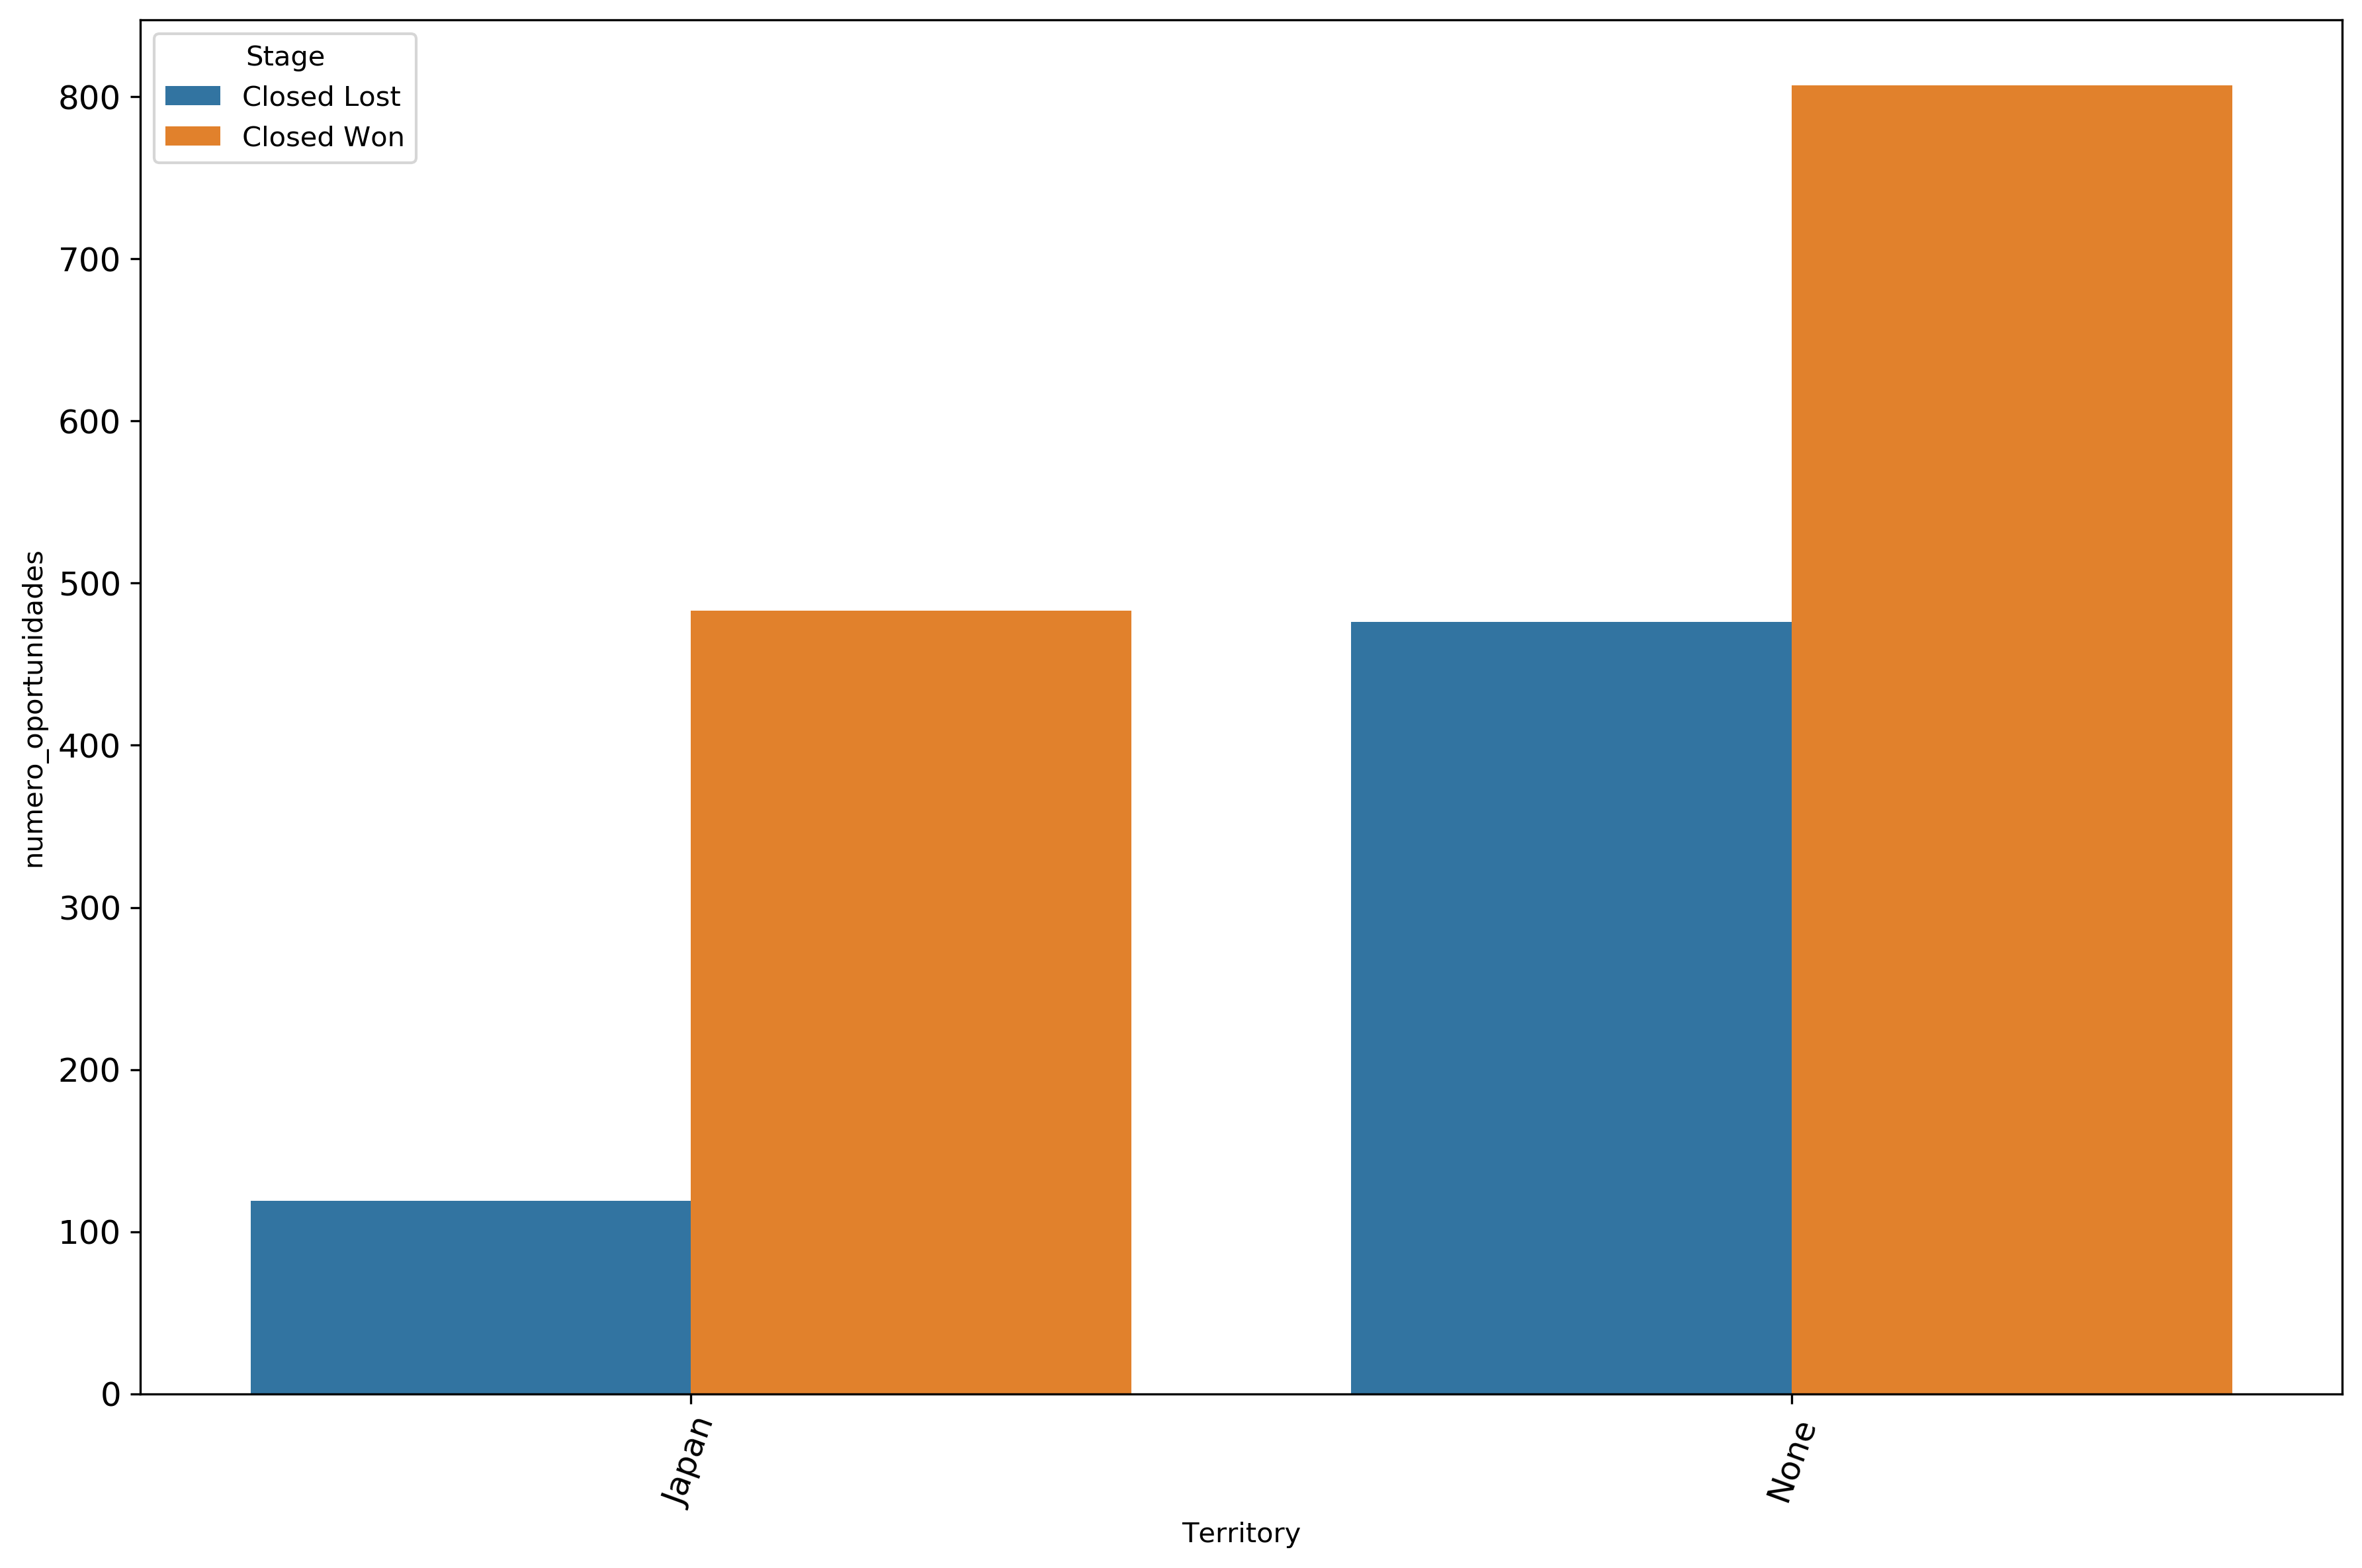

In [49]:
fig=plt.figure(figsize=(12,8), dpi= 300, facecolor='w', edgecolor='0.4')
sns.barplot(x='Territory', y='numero_oportunidades', hue='Stage', data=df_territorio.loc[df_territorio['Region'] == 'Japan'])
plt.xticks(rotation=70, fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()

## Paises por región - Americas:

In [38]:
df_territorio.loc[df_territorio['Region'] == 'Americas'].sort_values('numero_oportunidades', ascending=False)

,Stage,Region,Territory,numero_oportunidades
97,Closed Won,Americas,NW America,553
19,Closed Lost,Americas,NE America,338
20,Closed Lost,Americas,NW America,321
21,Closed Lost,Americas,None,259
22,Closed Lost,Americas,SE America,208
96,Closed Won,Americas,NE America,180
98,Closed Won,Americas,None,134
99,Closed Won,Americas,SE America,124
18,Closed Lost,Americas,Central US,90
23,Closed Lost,Americas,SW America,86


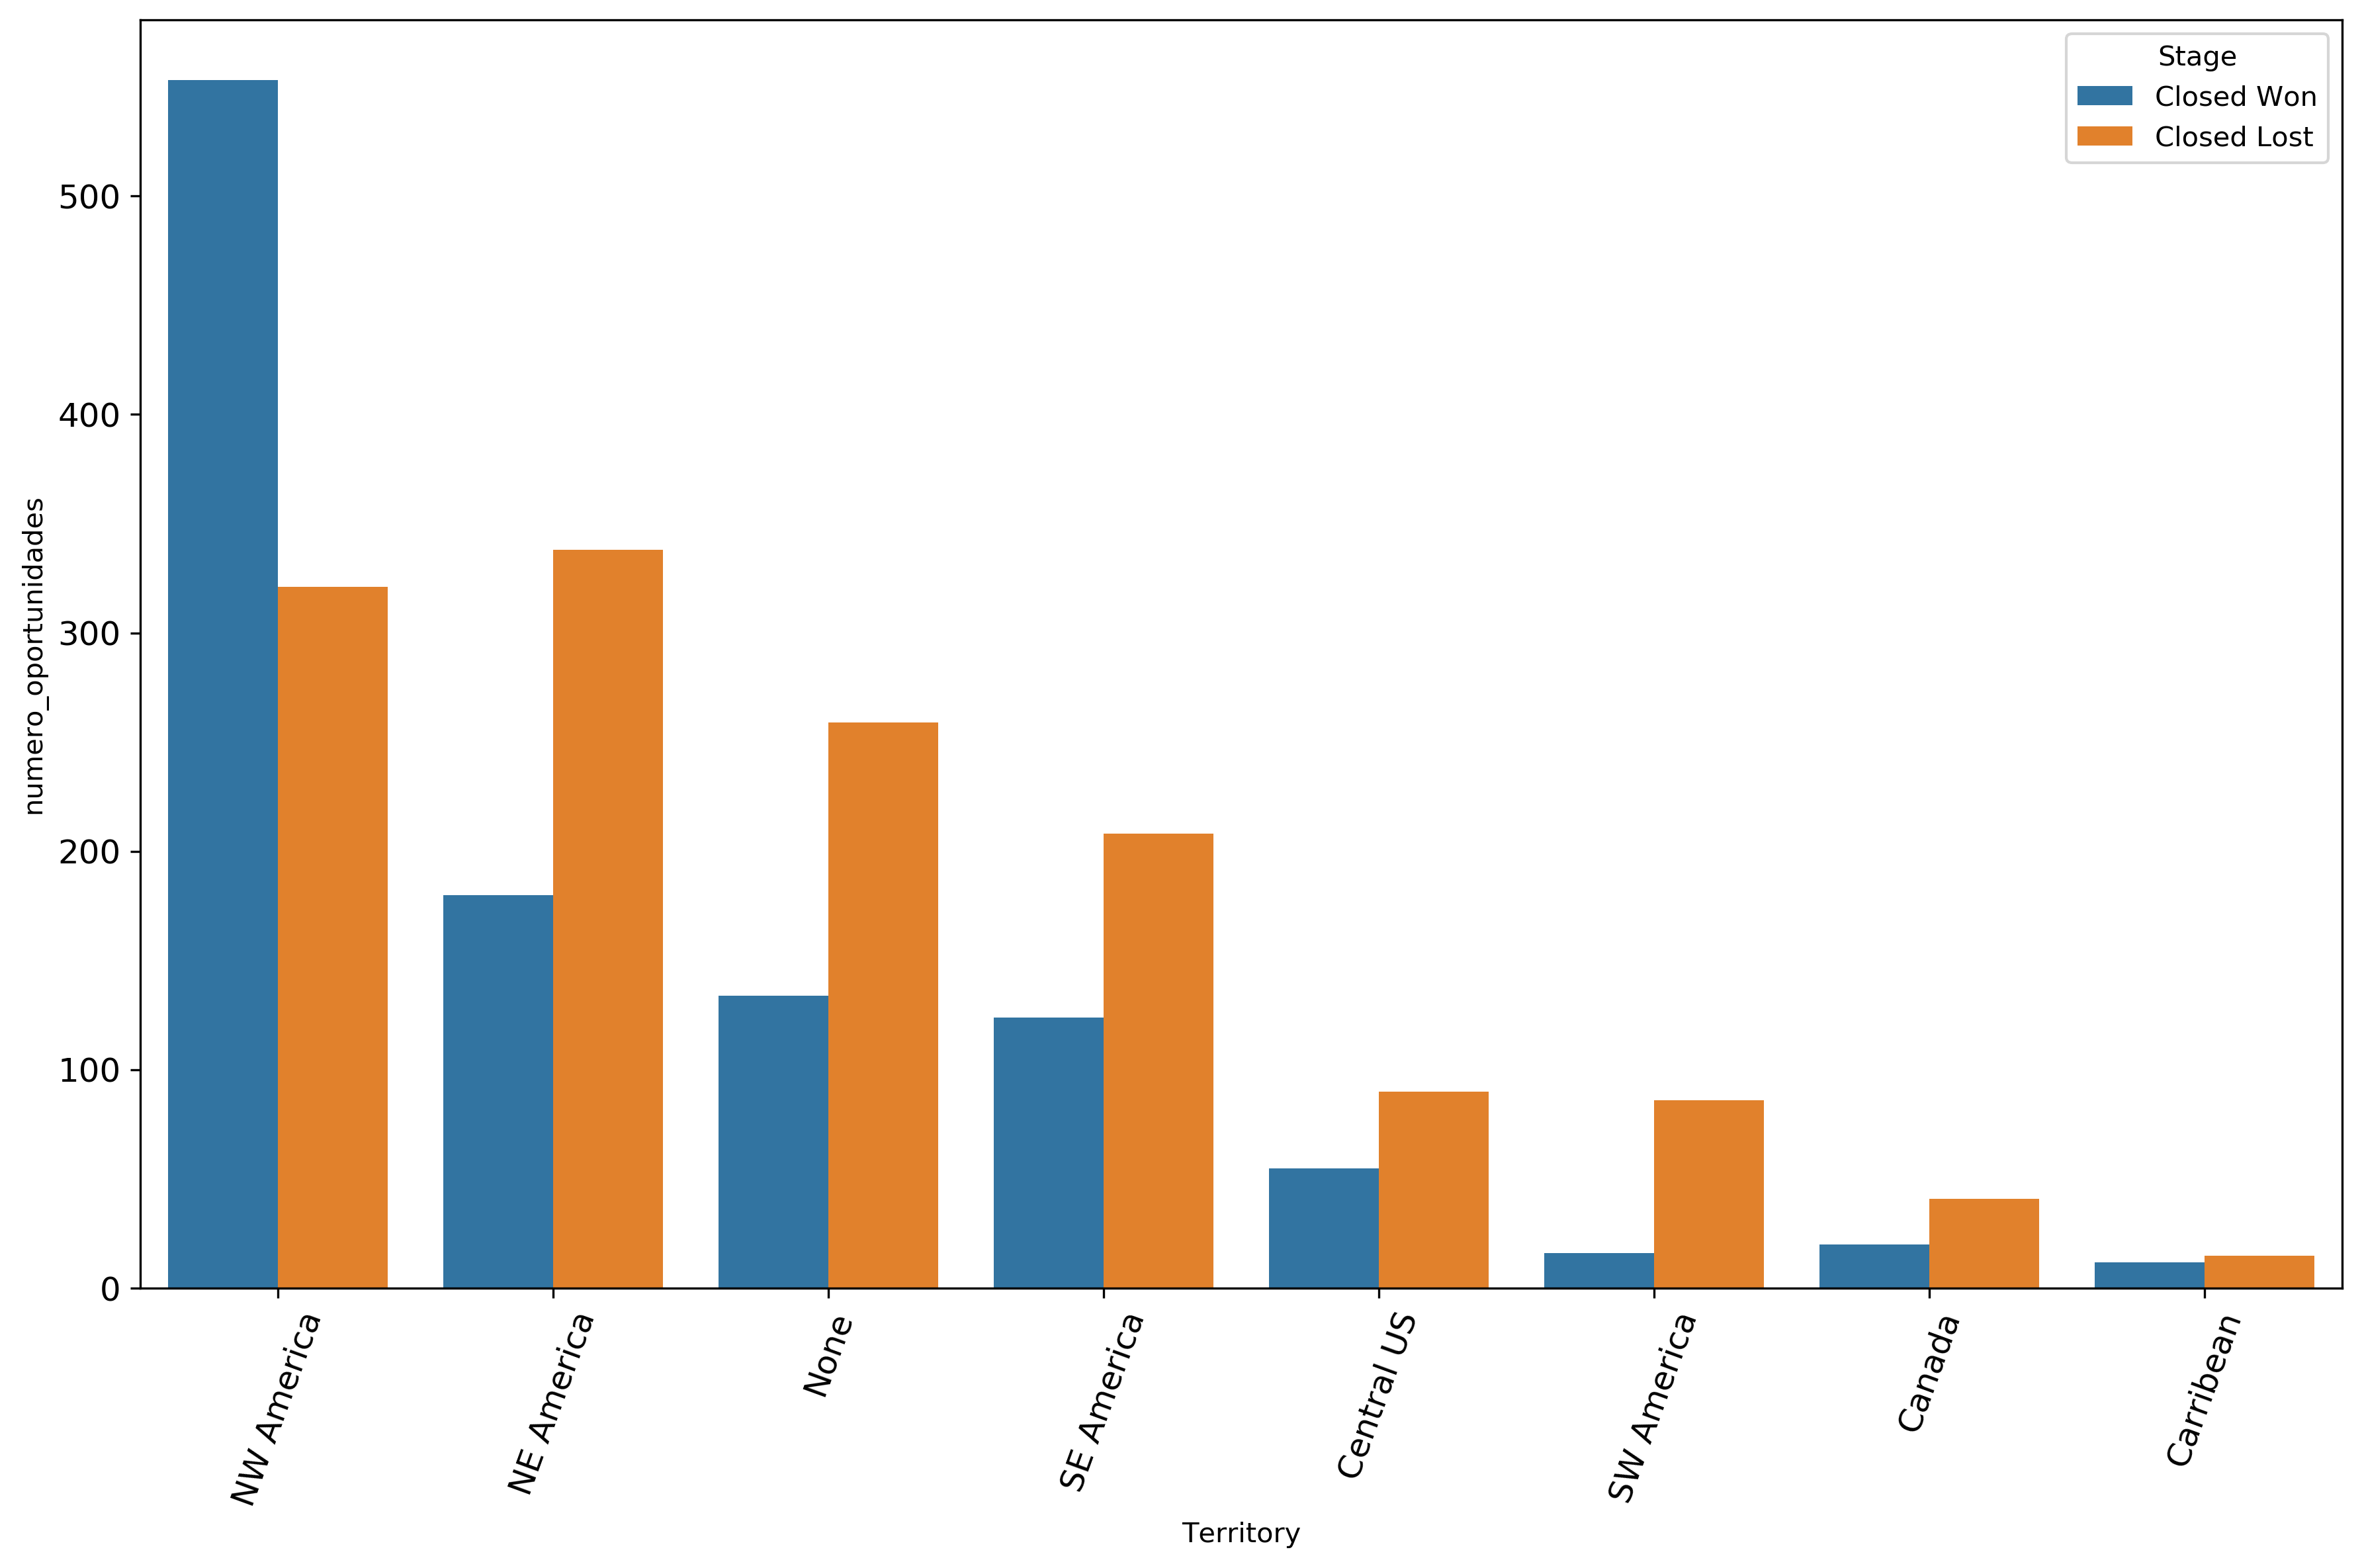

In [48]:
fig=plt.figure(figsize=(12,8), dpi= 300, facecolor='w', edgecolor='0.4')
sns.barplot(x='Territory', y='numero_oportunidades', hue='Stage', data=df_territorio.loc[df_territorio['Region'] == 'Americas'].sort_values('numero_oportunidades', ascending=False))
plt.xticks(rotation=70, fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()

## Paises por región - EMEA:

In [55]:
df_territorio.loc[df_territorio['Region'] == 'EMEA'].sort_values('numero_oportunidades', ascending=False)

,Stage,Region,Territory,numero_oportunidades
108,Closed Won,EMEA,Germany,592
40,Closed Lost,EMEA,Germany,488
38,Closed Lost,EMEA,France,277
54,Closed Lost,EMEA,Netherlands,223
116,Closed Won,EMEA,Netherlands,160
...,...,...,...,...
51,Closed Lost,EMEA,Malta,1
103,Closed Won,EMEA,Bulgaria,1
52,Closed Lost,EMEA,Monaco,1
25,Closed Lost,EMEA,Armenia,1


In [59]:
df_territorio.loc[(df_territorio['Region'] == 'EMEA') & (df_territorio['Territory'] == 'None'
                                                        )].sort_values('numero_oportunidades', ascending=False)

,Stage,Region,Territory,numero_oportunidades
55,Closed Lost,EMEA,None,107
117,Closed Won,EMEA,None,48


Existen 155 oportunidades de la región EMEA que no están categorizadas por territorio.

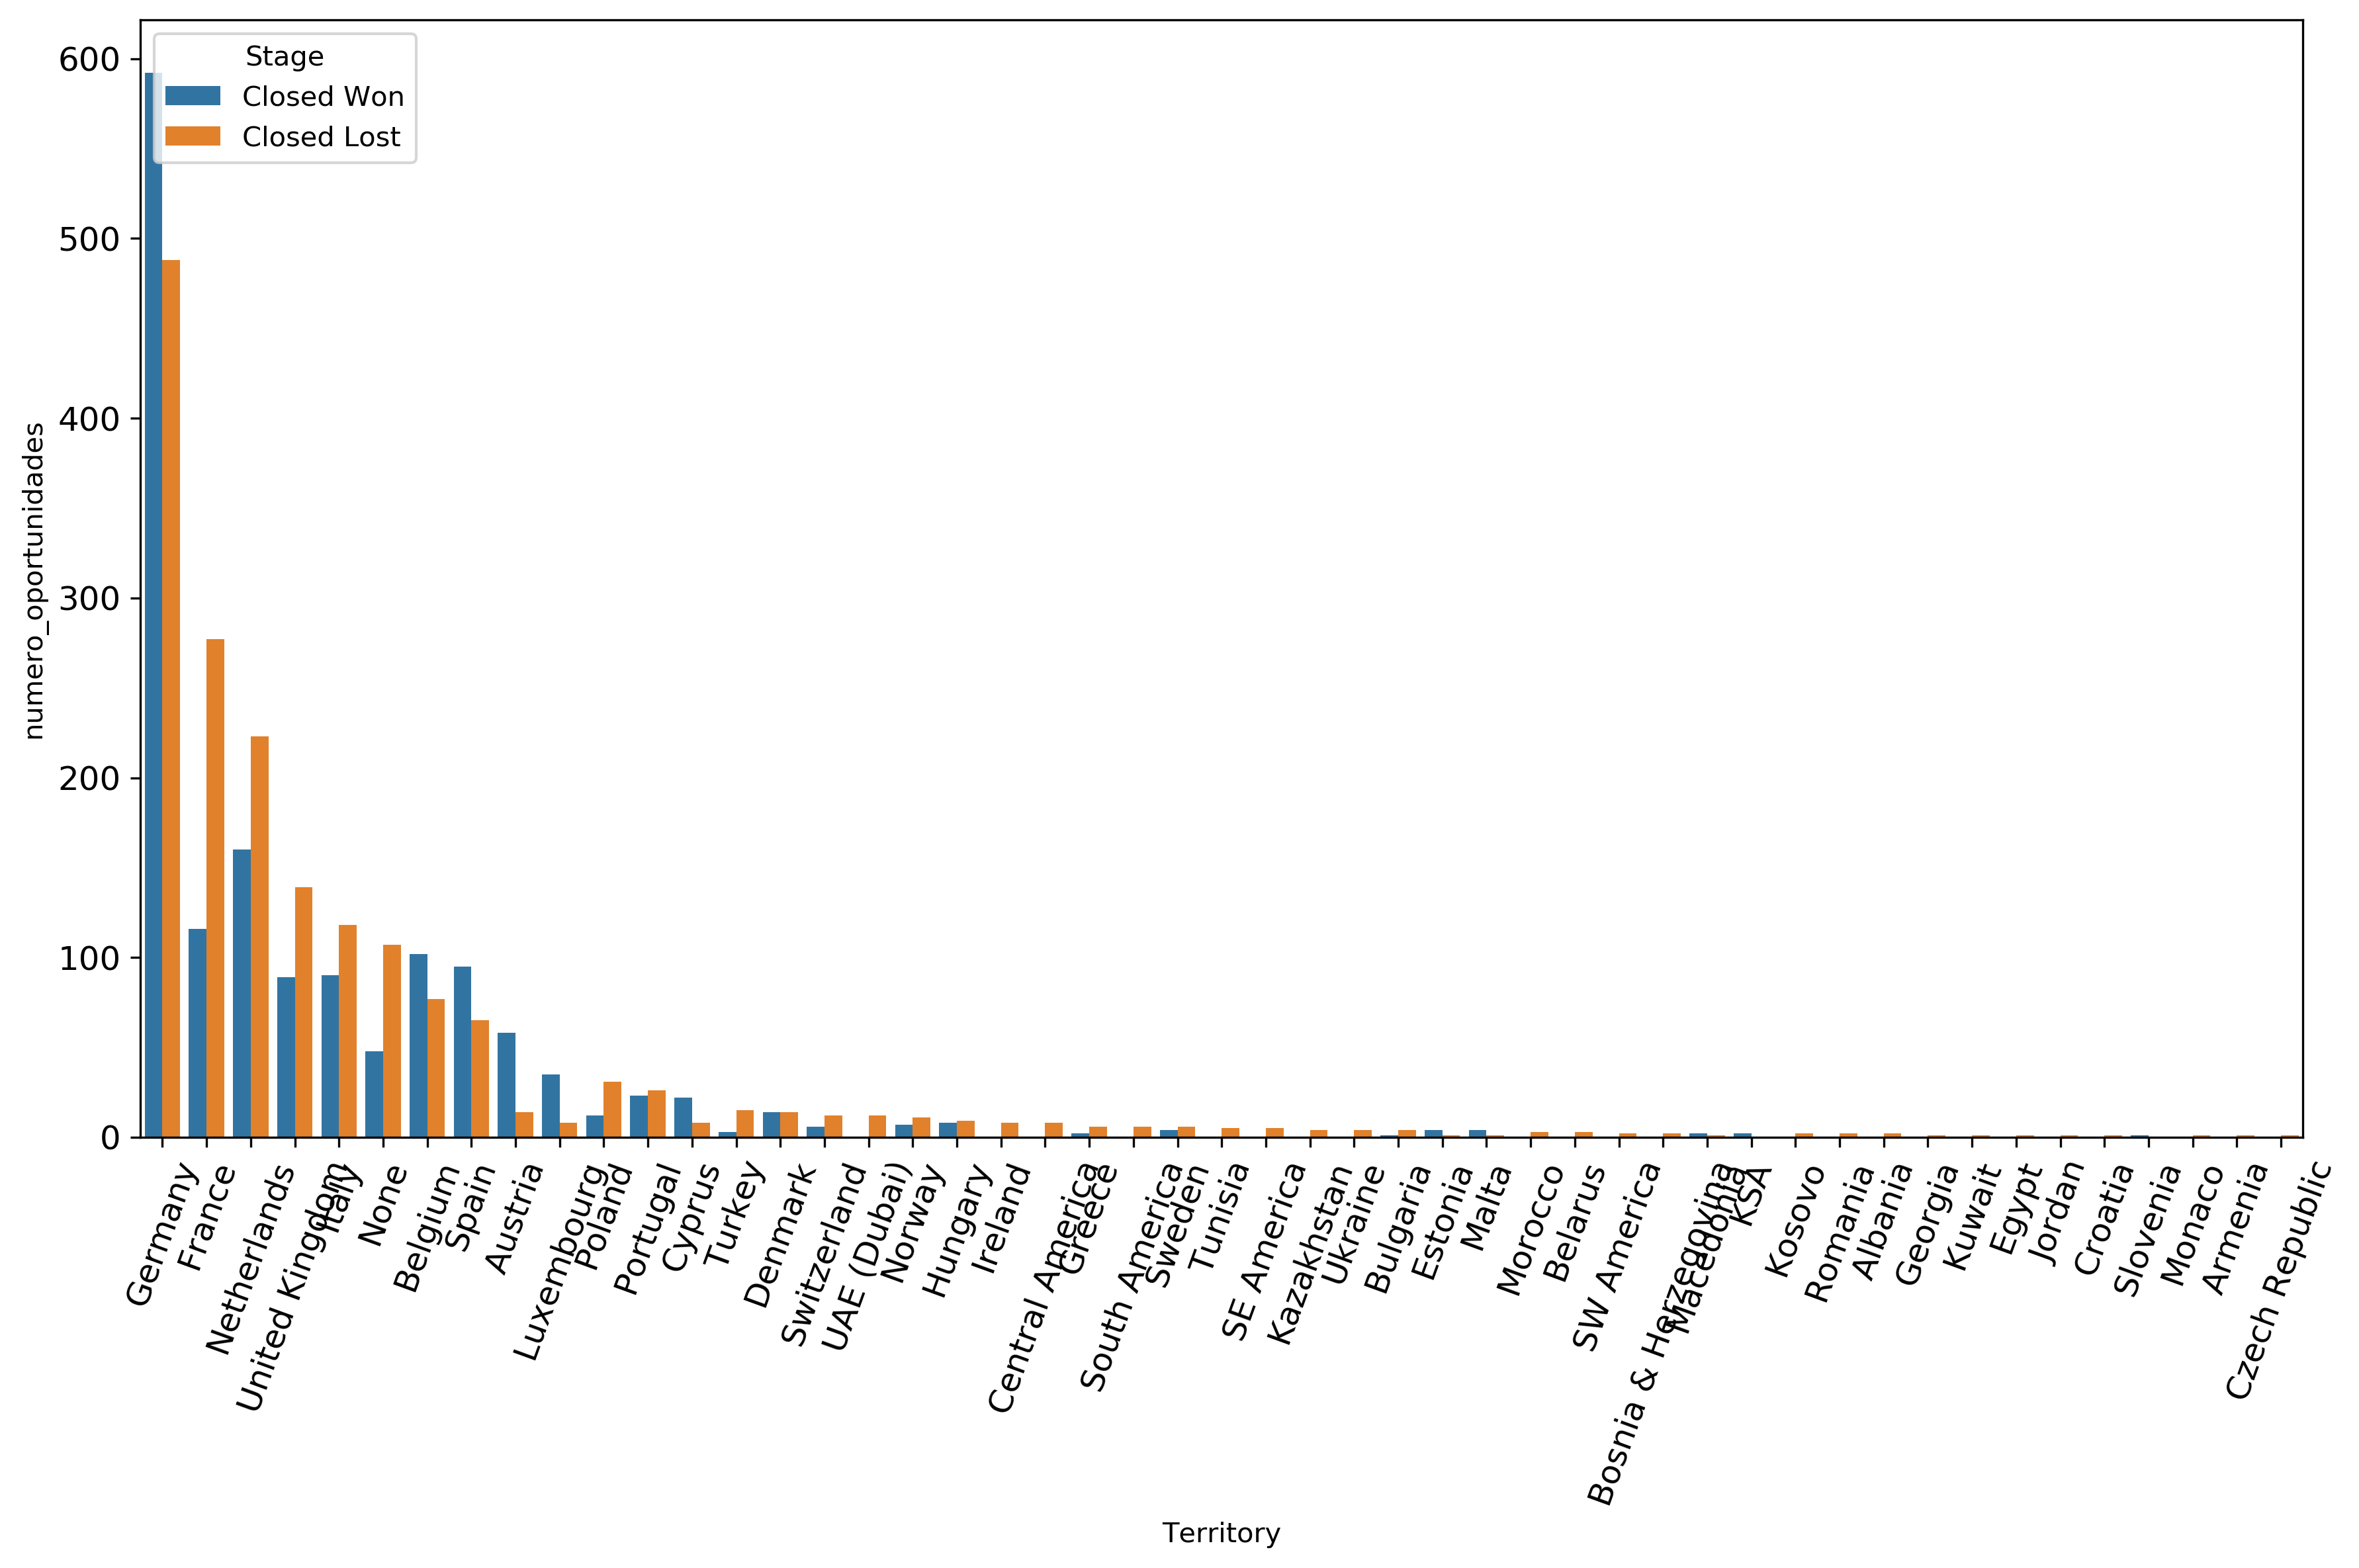

In [61]:
fig=plt.figure(figsize=(12,8), dpi= 300, facecolor='w', edgecolor='0.4')
sns.barplot(x='Territory', y='numero_oportunidades', hue='Stage', data=df_territorio.loc[df_territorio['Region'] == 
                                                    'EMEA'].sort_values('numero_oportunidades', ascending=False))
plt.xticks(rotation=70, fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()

## Paises por región - Middle East:

In [62]:
df_territorio.loc[df_territorio['Region'] == 'Middle East'].sort_values('numero_oportunidades', ascending=False)

,Stage,Region,Territory,numero_oportunidades
73,Closed Lost,Middle East,Jordan,59
129,Closed Won,Middle East,Jordan,21
76,Closed Lost,Middle East,None,17
79,Closed Lost,Middle East,UAE (Dubai),14
74,Closed Lost,Middle East,KSA,7
75,Closed Lost,Middle East,Kuwait,3
78,Closed Lost,Middle East,Pakistan,3
130,Closed Won,Middle East,KSA,3
131,Closed Won,Middle East,None,3
77,Closed Lost,Middle East,Oman,2


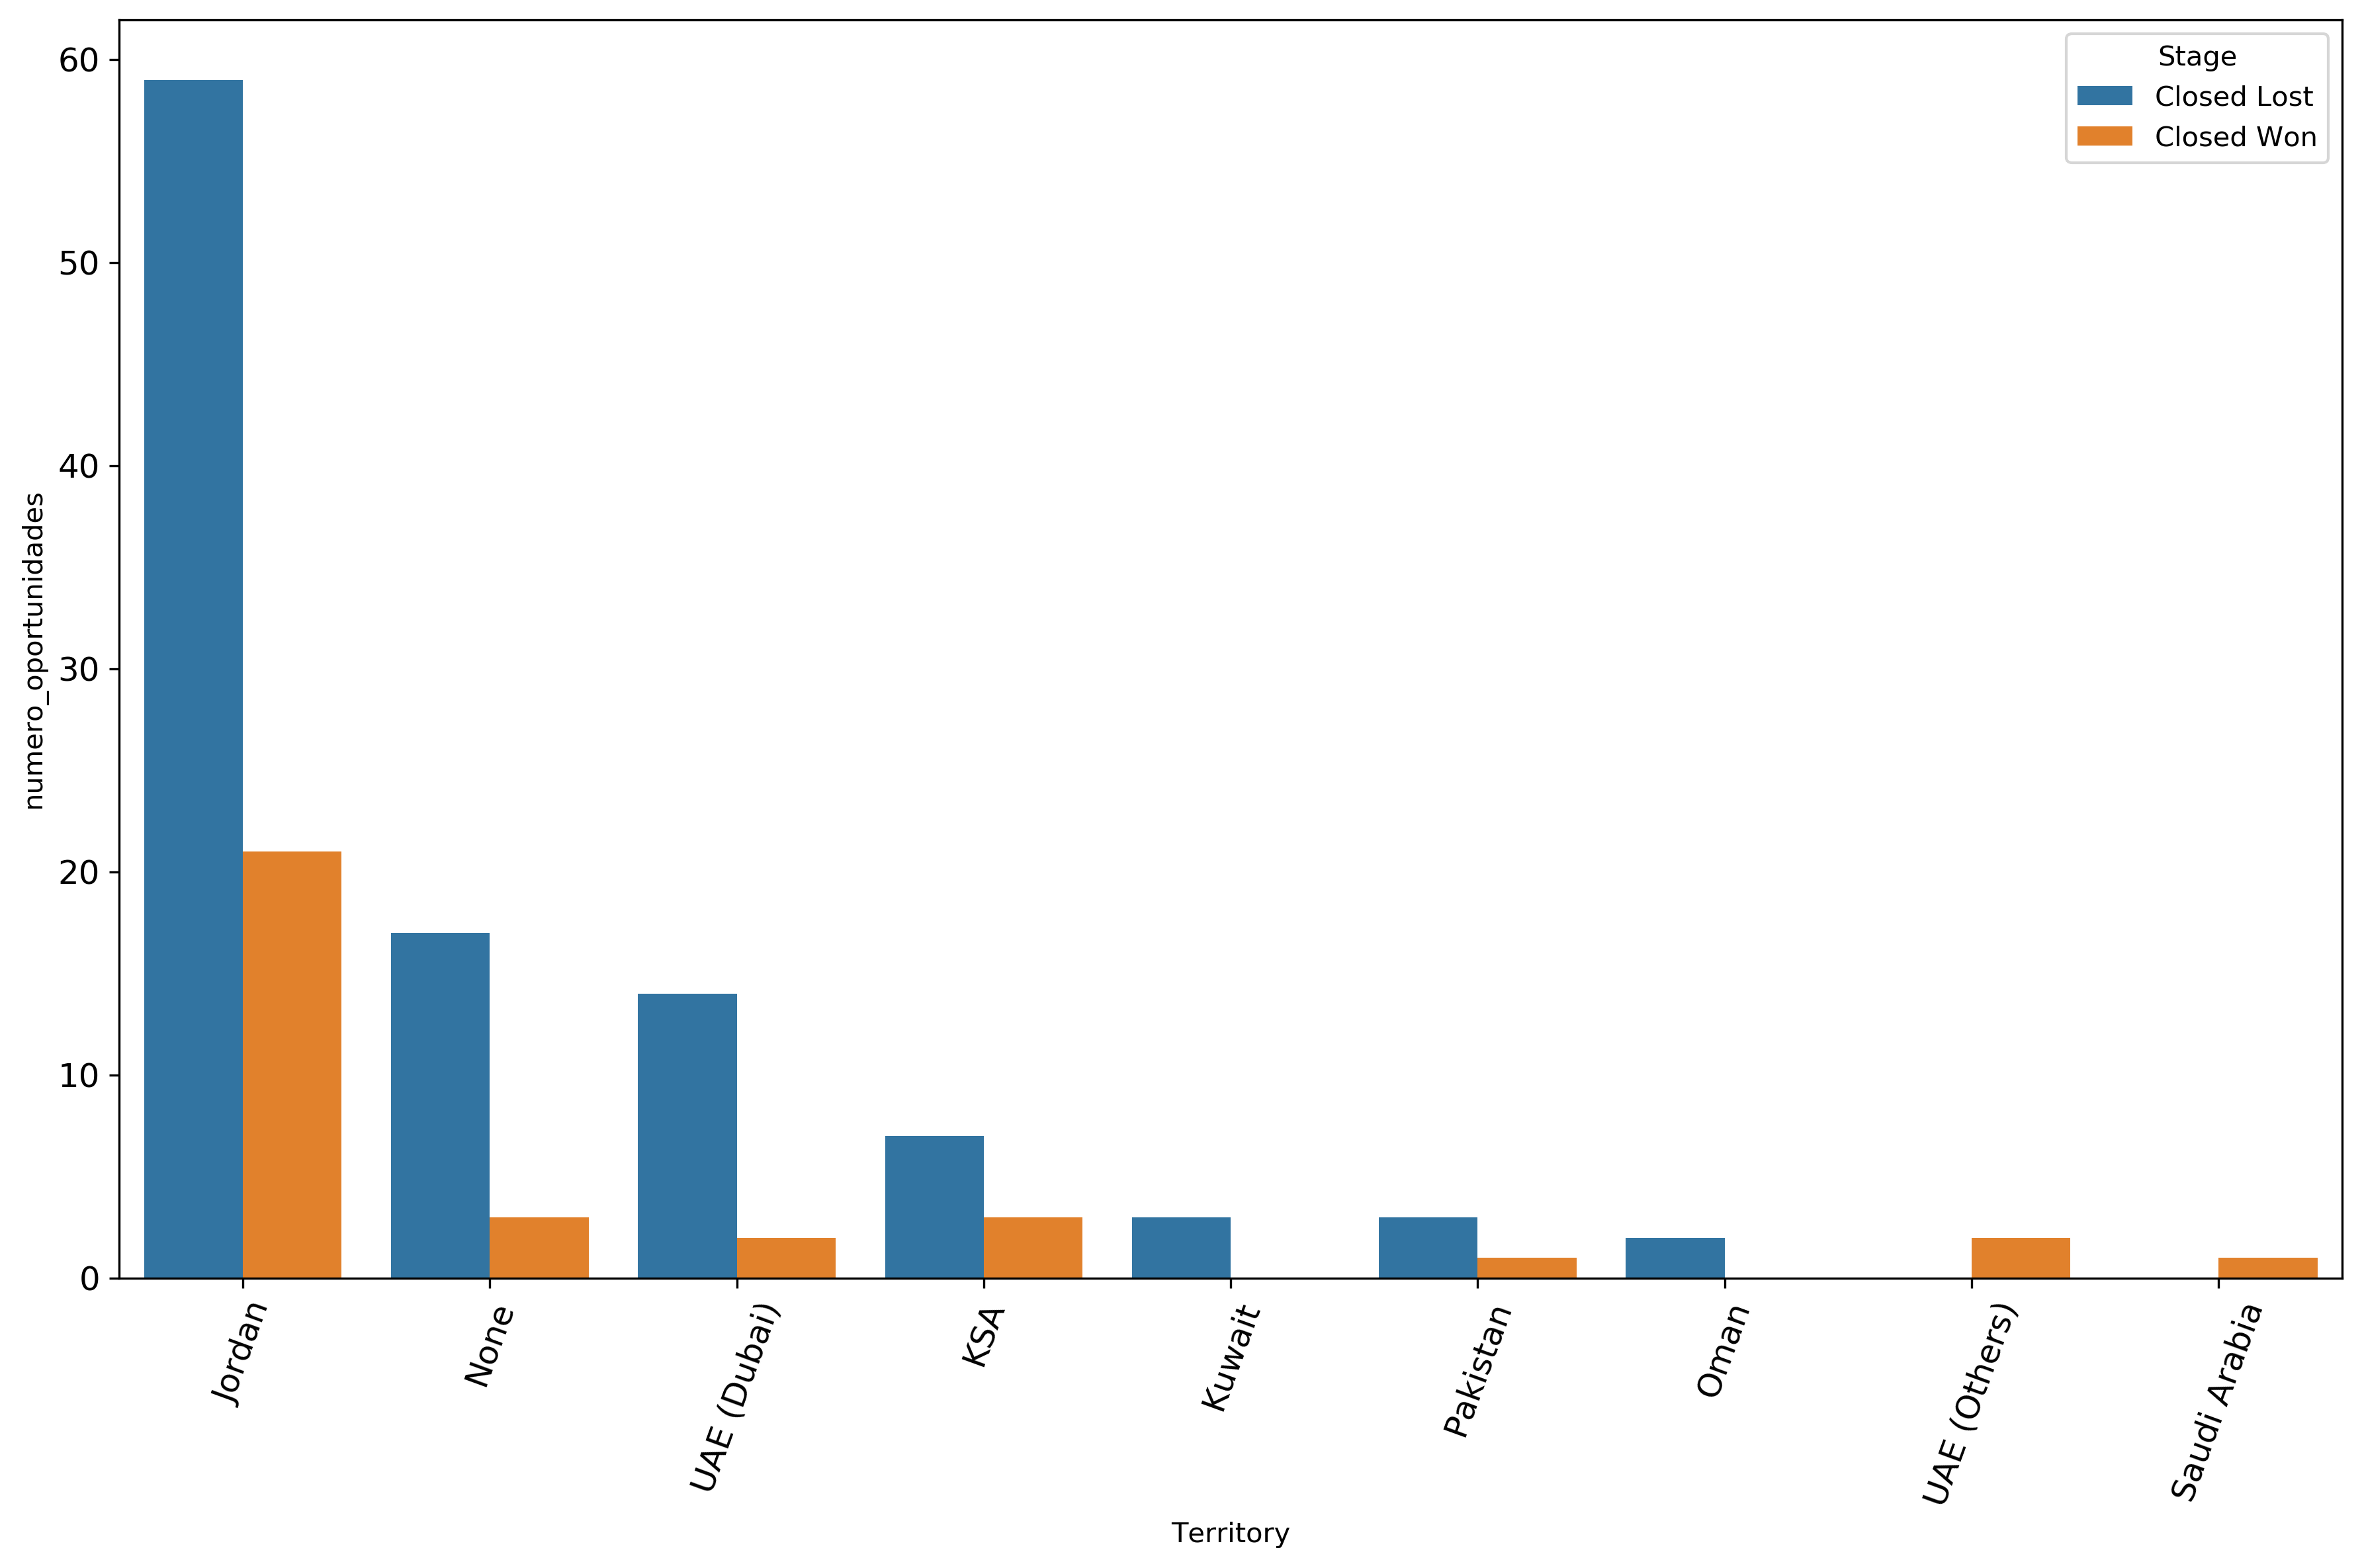

In [63]:
fig=plt.figure(figsize=(12,8), dpi= 300, facecolor='w', edgecolor='0.4')
sns.barplot(x='Territory', y='numero_oportunidades', hue='Stage', data=df_territorio.loc[df_territorio['Region'] == 
                                                    'Middle East'].sort_values('numero_oportunidades', ascending=False))
plt.xticks(rotation=70, fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()

## Variable Pricing, Delivery_Terms_Quote_Appr:

In [26]:
df_delivery_quote = df[['Stage', 'Pricing, Delivery_Terms_Quote_Appr', 'Opportunity_ID']].drop_duplicates()
df_delivery_quote = df_delivery_quote[(df_delivery_quote['Stage'] == 'Closed Lost') | (df_delivery_quote['Stage'] == 'Closed Won')]
df_delivery_quote = df_delivery_quote.groupby(['Stage','Pricing, Delivery_Terms_Quote_Appr'], as_index=False)['Opportunity_ID'].count()
df_delivery_quote.columns = ['Stage', 'Delivery_Terms_Quote_Appr', 'Cantidad']
df_delivery_quote

,Stage,Delivery_Terms_Quote_Appr,Cantidad
0,Closed Lost,0,880
1,Closed Lost,1,3839
2,Closed Won,0,1447
3,Closed Won,1,3625


In [27]:
# Determino el porcentaje con respecto al total
df_delivery_quote['Cantidad'] = df_delivery_quote['Cantidad'] / 9791 * 100

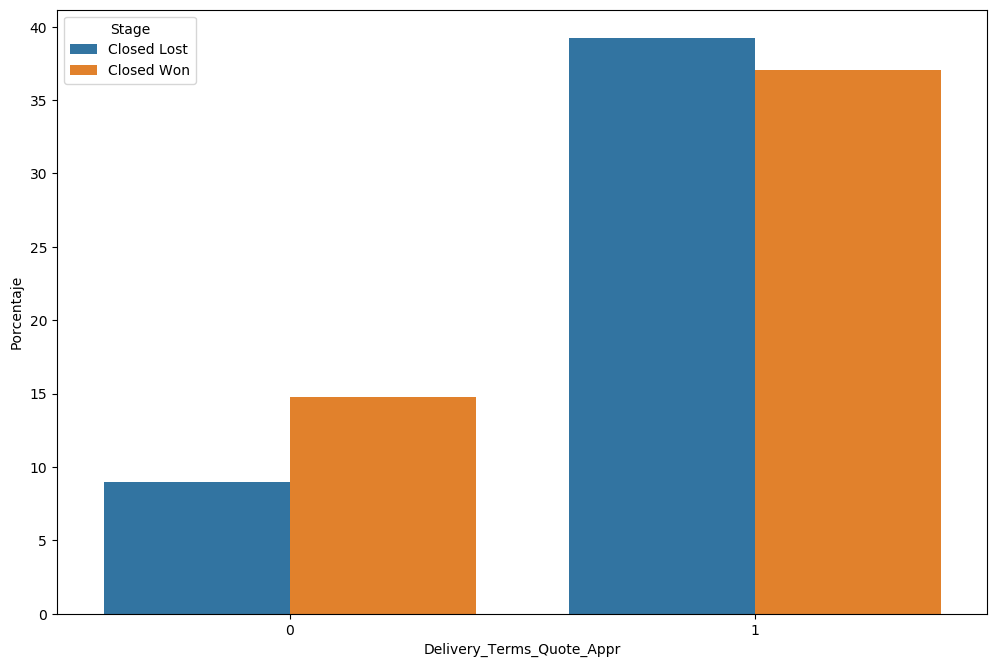

In [28]:
df_delivery_quote.columns = ['Stage', 'Delivery_Terms_Quote_Appr', 'Porcentaje']
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='0.4')
sns.barplot(x='Delivery_Terms_Quote_Appr', y='Porcentaje', hue='Stage', data=df_delivery_quote)

## Variable Pricing, Delivery_Terms_Approved:

In [29]:
df_delivery = df[['Stage', 'Pricing, Delivery_Terms_Approved', 'Opportunity_ID']].drop_duplicates()
df_delivery = df_delivery[(df_delivery['Stage'] == 'Closed Lost') | (df_delivery['Stage'] == 'Closed Won')]
df_delivery = df_delivery.groupby(['Stage','Pricing, Delivery_Terms_Approved'], as_index=False)['Opportunity_ID'].count()
df_delivery.columns = ['Stage', 'Delivery_Terms_Approved', 'Cantidad']
df_delivery

,Stage,Delivery_Terms_Approved,Cantidad
0,Closed Lost,0,2401
1,Closed Lost,1,2318
2,Closed Won,0,2006
3,Closed Won,1,3066


In [30]:
# Determino el porcentaje con respecto al total
df_delivery['Cantidad'] = df_delivery['Cantidad'] / 9791 * 100

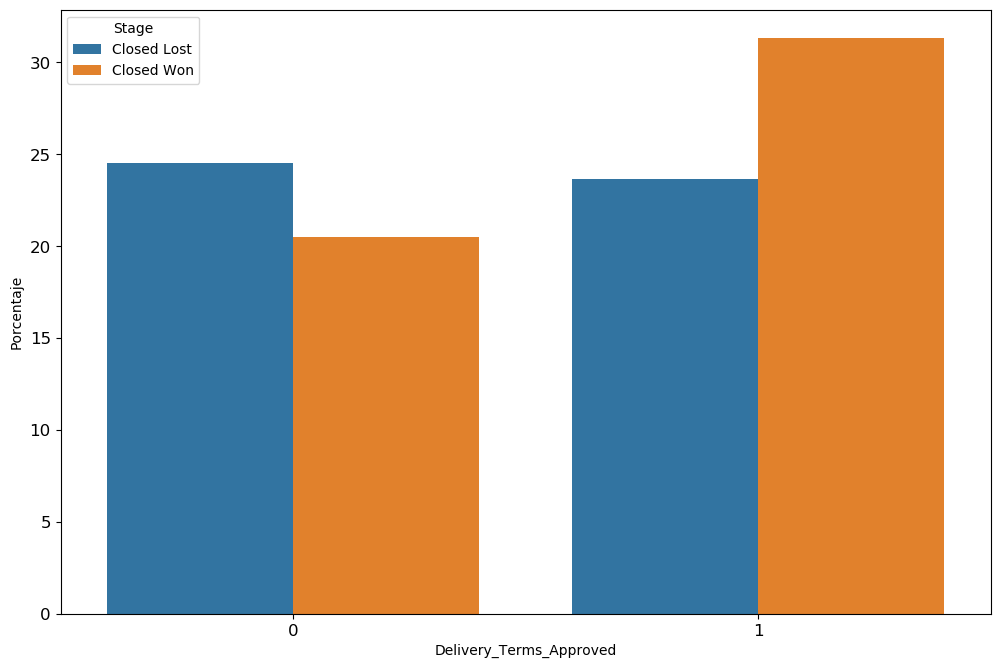

In [53]:
df_delivery.columns = ['Stage', 'Delivery_Terms_Approved', 'Porcentaje']
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='0.4')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.barplot(x='Delivery_Terms_Approved', y='Porcentaje', hue='Stage', data=df_delivery)

### Existe una relación entre la variable 'Pricing, Delivery_Terms_Approved' y la variable Stage, se observa más opertunidades ganadas cuando Delivery_Terms_Approved = 1

## Variable Bureaucratic_Code_0_Approval:

In [32]:
df_bureaucratic = df[['Stage', 'Bureaucratic_Code_0_Approval', 'Opportunity_ID']].drop_duplicates()
df_bureaucratic = df_bureaucratic[(df_bureaucratic['Stage'] == 'Closed Lost') | (df_bureaucratic['Stage'] == 'Closed Won')]
df_bureaucratic = df_bureaucratic.groupby(['Stage','Bureaucratic_Code_0_Approval'], as_index=False)['Opportunity_ID'].count()
df_bureaucratic.sort_values('Opportunity_ID', ascending=False)

,Stage,Bureaucratic_Code_0_Approval,Opportunity_ID
2,Closed Won,0,3072
1,Closed Lost,1,2883
3,Closed Won,1,2000
0,Closed Lost,0,1836


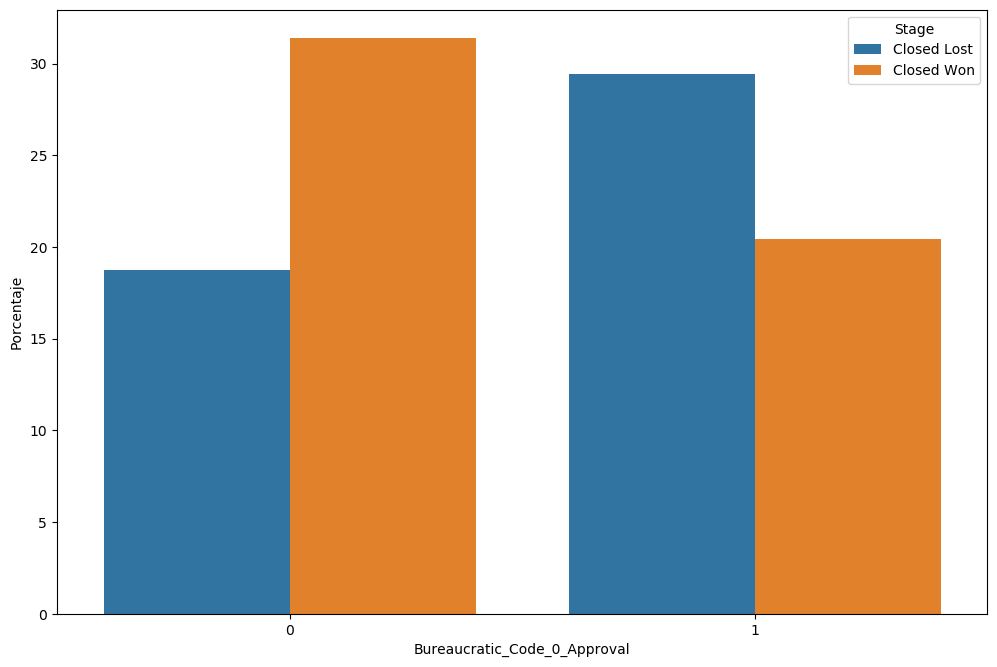

In [33]:
df_bureaucratic['Opportunity_ID'] = df_bureaucratic['Opportunity_ID'] / 9791 * 100
df_bureaucratic.columns = ['Stage', 'Bureaucratic_Code_0_Approval', 'Porcentaje']
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='0.4')
sns.barplot(x='Bureaucratic_Code_0_Approval', y='Porcentaje', hue='Stage', data=df_bureaucratic)

### Se observa mayor número de oprtunidades perdidas cuando la variable Bureaucratic_Code_0_Approval es igual a 0